In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.__version__

'1.1.4'

In [2]:
courses_df=pd.read_csv("dataset/courses.csv")
users_df=pd.read_csv("dataset/users.csv")
activity_df=pd.read_csv('dataset/activity.csv',parse_dates=[0])

In [3]:
courses_df.head()

,courseId,courseTitle,description,academicSession,org,modality
0,1,Introduction to Algebra,"Fundamental concepts of algebra, including exp...",Fall2020,MATH,f2f
1,2,Biology 101,Study of biology as it relates to humans and t...,Fall2020,BIOL,online
2,3,Intro to Python Programming,A first course in computer programming using t...,Fall2020,COMPSCI,hybrid
3,4,History of Ancient Civilizations,"In this course, we will study the emergence of...",Fall2020,HIST,hybrid


In [4]:
users_df.head()

,userId,FirstName,LastName,Role,email,year
0,1001,Tom,Grove,Learner,tgrove@email.edu,1.0
1,1002,Lily,Chen,Learner,lchen@email.edu,NaN
2,1003,Jim,Folsom,Learner,jim.folsom@email.edu,2.0
3,1004,Dan,Rivera,Learner,rivera_dan@email.edu,1.0
4,1005,Brenda,Ulloa,Learner,brendau@email.edu,NaN


In [5]:
activity_df.head()

,timestamp (YYYY-MM-DD HH:MI:SS),actor,action,object,course
0,2020-10-30 06:30:00,1001,viewed,/syllabus,2
1,2020-10-30 06:31:00,1001,viewed,/module1,2
2,2020-10-30 06:43:00,1001,viewed,/assignment1,2
3,2020-10-30 06:50:00,1001,viewed,/calendar,2
4,2020-10-31 10:10:20,1001,viewed,/syllabus,2


In [6]:
users_df.isnull()


,userId,FirstName,LastName,Role,email,year
0,False,False,False,False,False,False
1,False,False,False,False,False,True
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,True
5,False,False,False,False,False,True


In [7]:
users_df["year"].fillna("No Year",inplace=True)

In [8]:
users_df.head()

,userId,FirstName,LastName,Role,email,year
0,1001,Tom,Grove,Learner,tgrove@email.edu,1
1,1002,Lily,Chen,Learner,lchen@email.edu,No Year
2,1003,Jim,Folsom,Learner,jim.folsom@email.edu,2
3,1004,Dan,Rivera,Learner,rivera_dan@email.edu,1
4,1005,Brenda,Ulloa,Learner,brendau@email.edu,No Year


In [9]:
activity_df.head()

,timestamp (YYYY-MM-DD HH:MI:SS),actor,action,object,course
0,2020-10-30 06:30:00,1001,viewed,/syllabus,2
1,2020-10-30 06:31:00,1001,viewed,/module1,2
2,2020-10-30 06:43:00,1001,viewed,/assignment1,2
3,2020-10-30 06:50:00,1001,viewed,/calendar,2
4,2020-10-31 10:10:20,1001,viewed,/syllabus,2


In [10]:
object_to_category_dict={"syllabus":"Syllabus", "module":"Module", "assignment":"Assignment","calendar":"Calendar"}

def object_to_category( objectStr ):
    for objectKey in object_to_category_dict.keys():
        if objectKey in objectStr:
            return object_to_category_dict[objectKey]
    return "Other"
activity_df['category']=activity_df['object'].apply( object_to_category )


In [11]:
activity_df.head()

,timestamp (YYYY-MM-DD HH:MI:SS),actor,action,object,course,category
0,2020-10-30 06:30:00,1001,viewed,/syllabus,2,Syllabus
1,2020-10-30 06:31:00,1001,viewed,/module1,2,Module
2,2020-10-30 06:43:00,1001,viewed,/assignment1,2,Assignment
3,2020-10-30 06:50:00,1001,viewed,/calendar,2,Calendar
4,2020-10-31 10:10:20,1001,viewed,/syllabus,2,Syllabus


In [12]:
activity_df.tail()

,timestamp (YYYY-MM-DD HH:MI:SS),actor,action,object,course,category
40,2020-10-13 11:00:00,1006,updated,/syllabus,1,Syllabus
41,2020-10-14 11:00:00,1006,updated,/assignment1,1,Assignment
42,2020-10-15 11:00:00,1006,updated,/module1,1,Module
43,2020-10-16 11:00:00,1006,updated,/module2,1,Module
44,2020-10-17 11:00:00,1006,created,/assignment2,1,Assignment


In [13]:
courses_df

,courseId,courseTitle,description,academicSession,org,modality
0,1,Introduction to Algebra,"Fundamental concepts of algebra, including exp...",Fall2020,MATH,f2f
1,2,Biology 101,Study of biology as it relates to humans and t...,Fall2020,BIOL,online
2,3,Intro to Python Programming,A first course in computer programming using t...,Fall2020,COMPSCI,hybrid
3,4,History of Ancient Civilizations,"In this course, we will study the emergence of...",Fall2020,HIST,hybrid


In [14]:
users_df

,userId,FirstName,LastName,Role,email,year
0,1001,Tom,Grove,Learner,tgrove@email.edu,1
1,1002,Lily,Chen,Learner,lchen@email.edu,No Year
2,1003,Jim,Folsom,Learner,jim.folsom@email.edu,2
3,1004,Dan,Rivera,Learner,rivera_dan@email.edu,1
4,1005,Brenda,Ulloa,Learner,brendau@email.edu,No Year
5,1006,Tammy,Teacher,Instructor,tteach@email.edu,No Year


In [15]:
activity_df

,timestamp (YYYY-MM-DD HH:MI:SS),actor,action,object,course,category
0,2020-10-30 06:30:00,1001,viewed,/syllabus,2,Syllabus
1,2020-10-30 06:31:00,1001,viewed,/module1,2,Module
2,2020-10-30 06:43:00,1001,viewed,/assignment1,2,Assignment
3,2020-10-30 06:50:00,1001,viewed,/calendar,2,Calendar
4,2020-10-31 10:10:20,1001,viewed,/syllabus,2,Syllabus
5,2020-11-01 10:12:20,1001,viewed,/assignment1,2,Assignment
6,2020-11-02 10:20:20,1001,viewed,/module1,2,Module
7,2020-11-03 10:30:20,1001,viewed,/module2,2,Module
8,2020-11-04 10:32:30,1001,viewed,/assignment2,2,Assignment
9,2020-10-30 08:30:00,1002,viewed,/syllabus,2,Syllabus


In [16]:
new_df=activity_df.merge(users_df,left_on='actor', right_on='userId')

In [17]:
new_df

,timestamp (YYYY-MM-DD HH:MI:SS),actor,action,object,course,category,userId,FirstName,LastName,Role,email,year
0,2020-10-30 06:30:00,1001,viewed,/syllabus,2,Syllabus,1001,Tom,Grove,Learner,tgrove@email.edu,1
1,2020-10-30 06:31:00,1001,viewed,/module1,2,Module,1001,Tom,Grove,Learner,tgrove@email.edu,1
2,2020-10-30 06:43:00,1001,viewed,/assignment1,2,Assignment,1001,Tom,Grove,Learner,tgrove@email.edu,1
3,2020-10-30 06:50:00,1001,viewed,/calendar,2,Calendar,1001,Tom,Grove,Learner,tgrove@email.edu,1
4,2020-10-31 10:10:20,1001,viewed,/syllabus,2,Syllabus,1001,Tom,Grove,Learner,tgrove@email.edu,1
5,2020-11-01 10:12:20,1001,viewed,/assignment1,2,Assignment,1001,Tom,Grove,Learner,tgrove@email.edu,1
6,2020-11-02 10:20:20,1001,viewed,/module1,2,Module,1001,Tom,Grove,Learner,tgrove@email.edu,1
7,2020-11-03 10:30:20,1001,viewed,/module2,2,Module,1001,Tom,Grove,Learner,tgrove@email.edu,1
8,2020-11-04 10:32:30,1001,viewed,/assignment2,2,Assignment,1001,Tom,Grove,Learner,tgrove@email.edu,1
9,2020-10-30 08:30:00,1002,viewed,/syllabus,2,Syllabus,1002,Lily,Chen,Learner,lchen@email.edu,No Year


In [18]:
new_df.merge(courses_df,left_on='course', right_on='courseId')

,timestamp (YYYY-MM-DD HH:MI:SS),actor,action,object,course,category,userId,FirstName,LastName,Role,email,year,courseId,courseTitle,description,academicSession,org,modality
0,2020-10-30 06:30:00,1001,viewed,/syllabus,2,Syllabus,1001,Tom,Grove,Learner,tgrove@email.edu,1,2,Biology 101,Study of biology as it relates to humans and t...,Fall2020,BIOL,online
1,2020-10-30 06:31:00,1001,viewed,/module1,2,Module,1001,Tom,Grove,Learner,tgrove@email.edu,1,2,Biology 101,Study of biology as it relates to humans and t...,Fall2020,BIOL,online
2,2020-10-30 06:43:00,1001,viewed,/assignment1,2,Assignment,1001,Tom,Grove,Learner,tgrove@email.edu,1,2,Biology 101,Study of biology as it relates to humans and t...,Fall2020,BIOL,online
3,2020-10-30 06:50:00,1001,viewed,/calendar,2,Calendar,1001,Tom,Grove,Learner,tgrove@email.edu,1,2,Biology 101,Study of biology as it relates to humans and t...,Fall2020,BIOL,online
4,2020-10-31 10:10:20,1001,viewed,/syllabus,2,Syllabus,1001,Tom,Grove,Learner,tgrove@email.edu,1,2,Biology 101,Study of biology as it relates to humans and t...,Fall2020,BIOL,online
5,2020-11-01 10:12:20,1001,viewed,/assignment1,2,Assignment,1001,Tom,Grove,Learner,tgrove@email.edu,1,2,Biology 101,Study of biology as it relates to humans and t...,Fall2020,BIOL,online
6,2020-11-02 10:20:20,1001,viewed,/module1,2,Module,1001,Tom,Grove,Learner,tgrove@email.edu,1,2,Biology 101,Study of biology as it relates to humans and t...,Fall2020,BIOL,online
7,2020-11-03 10:30:20,1001,viewed,/module2,2,Module,1001,Tom,Grove,Learner,tgrove@email.edu,1,2,Biology 101,Study of biology as it relates to humans and t...,Fall2020,BIOL,online
8,2020-11-04 10:32:30,1001,viewed,/assignment2,2,Assignment,1001,Tom,Grove,Learner,tgrove@email.edu,1,2,Biology 101,Study of biology as it relates to humans and t...,Fall2020,BIOL,online
9,2020-10-30 08:30:00,1002,viewed,/syllabus,2,Syllabus,1002,Lily,Chen,Learner,lchen@email.edu,No Year,2,Biology 101,Study of biology as it relates to humans and t...,Fall2020,BIOL,online


In [19]:
new_df['object'].value_counts()[:5]

/syllabus       10
/module1        10
/assignment1    10
/assignment2     5
/module2         5
Name: object, dtype: int64

<AxesSubplot:>

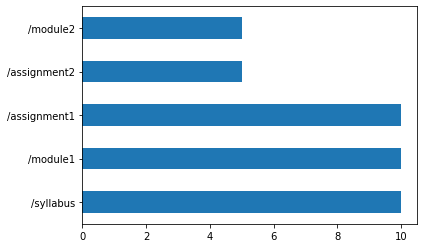

In [20]:
new_df['object'].value_counts()[:5].plot(kind='barh')

In [21]:
new_df.shape

(45, 12)

In [22]:
new_df.dtypes

timestamp (YYYY-MM-DD HH:MI:SS)    datetime64[ns]
actor                                       int64
action                                     object
object                                     object
course                                      int64
category                                   object
userId                                      int64
FirstName                                  object
LastName                                   object
Role                                       object
email                                      object
year                                       object
dtype: object

In [26]:
new_df[1].year

KeyError: 1